In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step_function(x):
    return np.where(x<=0,0,1)

In [3]:
x = np.linspace(-5,5)
y = step_function(x)

In [4]:
x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

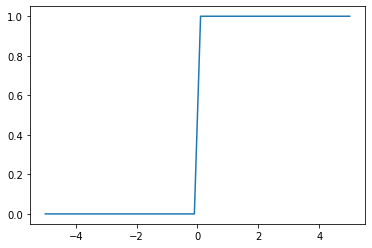

In [6]:
plt.plot(x,y)
plt.show()

In [7]:
#시그모이드
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

In [8]:
y=sigmoid_function(x)

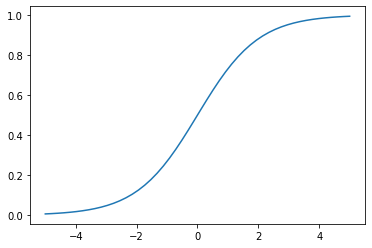

In [9]:
plt.plot(x,y)
plt.show()

In [10]:
#하이퍼볼릭 탄젠트
def tanh_function(x):
    return np.tanh(x)

In [11]:
y = tanh_function(x)

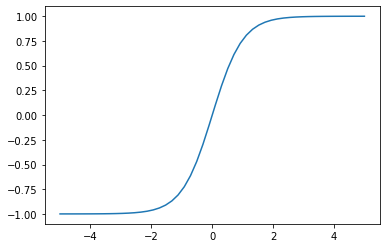

In [12]:
plt.plot(x,y)
plt.show()

In [13]:
#ReLU, 램프함수
def relu_function(x):
    return np.where(x<=0,0,x)

In [14]:
y = relu_function(x)

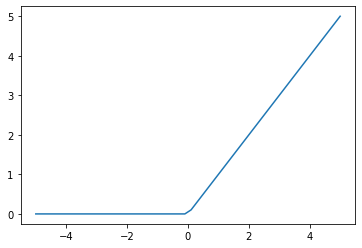

In [15]:
plt.plot(x,y)
plt.show()

In [16]:
#Leaky ReLU
def leaky_relu_function(x):
    return np.where(x<=0, 0.01*x, x)

In [17]:
y = leaky_relu_function(x)

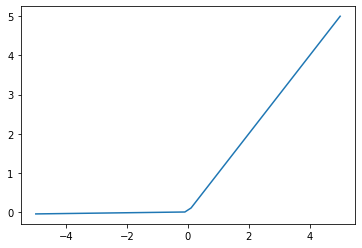

In [18]:
plt.plot(x,y)
plt.show()

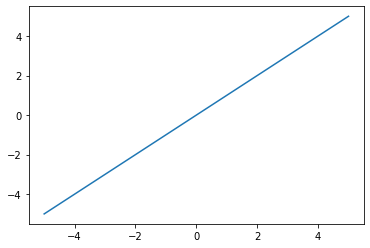

In [19]:
#항등함수
y=x
plt.plot(x,y)
plt.show()

In [20]:
# softmax
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x))

In [22]:
y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


In [23]:
# 신경망 구현

In [24]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0,1.0,0.2)

In [25]:
Z = np.zeros((10,10))

In [26]:
w_x = 2.5
w_y = 3.0
bias = 0.1

In [27]:
for i in range(10):
    for j in range(10):
        u = X[i]*w_x + Y[j]*w_y + bias
        
        y = 1/(1+np.exp(-u))
        Z[j][i] = y

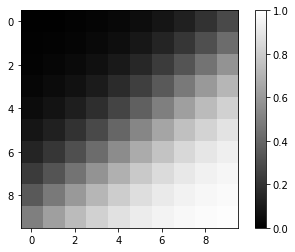

In [29]:
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

In [ ]:
# 2*2*1 신경망구현

In [30]:
#은닉층
def middle_layer(x,w,b):
    u = np.dot(x,w) + b
    return 1/(1+np.exp(-u))

In [31]:
def output_layer(x,w,b):
    u = np.dot(x,w) +b
    return u

In [33]:
#가중치
w_im = np.array([[4.0,4.0],
                 [4.0,4.0]])
w_mo = np.array([[1.0],
                 [-1.0]])

In [34]:
# bias
b_im = np.array([3.0,-3.0])
b_mo = np.array([0.1])

In [35]:
# 입력
X = np.arange(-1.0,1.0,0.2)
Y = np.arange(-1.0,1.0,0.2)

#출력저장
Z = np.zeros((10,10))

In [37]:
for i in range(10):
    for j in range(10):
        inp = np.array([X[i],Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[i][j] = out[0]

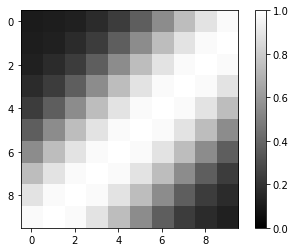

In [38]:
%matplotlib inline
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

In [39]:
# 분류 신경망 구현

In [40]:
def output_layer(x,w,b):
    u = np.dot(x,w) + b
    return np.exp(u)/np.sum(np.exp(u))

In [41]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0,1.0,0.1)

w_im = np.array([[1.0,2.0],
                [2.0,3.0]])
w_mo = np.array([[-1.0,1.0],
                [1.0,-1.0]])

b_im = np.array([0.3,-0.3])
b_mo = np.array([0.4,0.1])

In [42]:
x_1=[]
y_1=[]
x_2=[]
y_2=[]

In [47]:
for i in range(20):
    for j in range(20):
        inp=np.array([X[i],Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)

        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])

[0.54586741 0.45413259]
[0.54032953 0.45967047]
[0.53389311 0.46610689]
[0.52649098 0.47350902]
[0.51808911 0.48191089]
[0.50870712 0.49129288]
[0.49844336 0.50155664]
[0.48750296 0.51249704]
[0.47622478 0.52377522]
[0.4651008 0.5348992]
[0.45477927 0.54522073]
[0.44604206 0.55395794]
[0.4397481 0.5602519]
[0.43673849 0.56326151]
[0.43770571 0.56229429]
[0.44303984 0.55696016]
[0.45268269 0.54731731]
[0.46604147 0.53395853]
[0.4820226 0.5179774]
[0.49921378 0.50078622]
[0.54335157 0.45664843]
[0.53742481 0.46257519]
[0.53058001 0.46941999]
[0.52276979 0.47723021]
[0.51399097 0.48600903]
[0.50430758 0.49569242]
[0.49387784 0.50612216]
[0.4829819 0.5170181]
[0.47204515 0.52795485]
[0.46164906 0.53835094]
[0.45252006 0.54747994]
[0.44548691 0.55451309]
[0.4414003 0.5585997]
[0.44101357 0.55898643]
[0.44483375 0.55516625]
[0.45296748 0.54703252]
[0.46500788 0.53499212]
[0.4800234 0.5199766]
[0.49669202 0.50330798]
[0.51356243 0.48643757]
[0.54067659 0.45932341]
[0.53436018 0.46563982]
[0.5

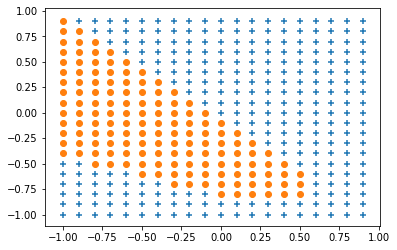

In [44]:
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()